<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Time_Series_Using_Auto_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from datetime import datetime
import seaborn as sns   

In [48]:
from google.colab import files
uploaded = files.upload()

Saving NYC_ED.csv to NYC_ED (2).csv


In [49]:
df1 = pd.read_csv('NYC_ED.csv')

In [50]:
df1.head()

,TimeStamp,Demand,Preciptation,Temperature
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeStamp     49205 non-null  object 
 1   Demand        49124 non-null  float64
 2   Preciptation  48975 non-null  float64
 3   Temperature   49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [52]:
df1['TimeStamp'] = pd.to_datetime(df1.TimeStamp)
df1.dtypes

TimeStamp       datetime64[ns]
Demand                 float64
Preciptation           float64
Temperature            float64
dtype: object

In [53]:
figure = px.line(df1, x='TimeStamp', y='Demand', title='NYED')

figure.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="todate"),
            dict(count=2, label="3y", step="year", stepmode="todate"),
            dict(count=3, label="5y", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)
figure.show()

In [54]:
df1= df1.set_index('TimeStamp')

In [55]:
df1.head()

,Demand,Preciptation,Temperature
TimeStamp,,,
2012-01-01 00:00:00,4937.5,0.0,46.13
2012-01-01 01:00:00,4752.1,0.0,45.89
2012-01-01 02:00:00,4542.6,0.0,45.04
2012-01-01 03:00:00,4357.7,0.0,45.03
2012-01-01 04:00:00,4275.5,0.0,42.61


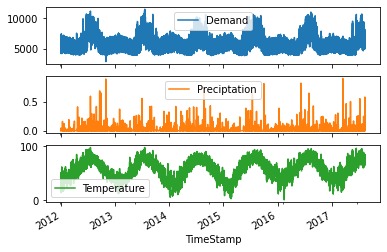

In [56]:
df1.plot(subplots=True);

In [57]:
df1.shape

(49205, 3)

In [58]:
df1.isnull().sum()

Demand           81
Preciptation    230
Temperature     186
dtype: int64

In [59]:
df1.query('Demand != Demand')

,Demand,Preciptation,Temperature
TimeStamp,,,
2012-03-11 02:00:00,NaN,0.0000,37.78
2013-03-10 02:00:00,NaN,0.0000,38.18
2014-03-09 02:00:00,NaN,0.0000,40.86
2015-03-08 02:00:00,NaN,0.0000,36.96
2015-03-11 11:00:00,NaN,0.0000,49.95
2015-10-04 11:00:00,NaN,0.0000,55.50
2015-10-04 12:00:00,NaN,0.0000,57.24
2016-01-28 20:00:00,NaN,0.0000,36.62
2016-01-28 21:00:00,NaN,0.0000,39.05


In [60]:
df1['Demand'] =  df1['Demand'].fillna(method ='ffill')
df1['Temperature'] = df1['Temperature'].fillna(method='bfill')

In [61]:
df1.isnull().sum()

Demand            0
Preciptation    230
Temperature       0
dtype: int64

In [62]:
month_level = df1.resample('M').mean()
month_level

,Demand,Preciptation,Temperature
TimeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
2012-06-30,6634.310278,0.003678,70.434472
2012-07-31,7917.395296,0.004233,77.742823
2012-08-31,7622.954704,0.005136,73.931344
2012-09-30,6412.603472,0.008160,67.098111


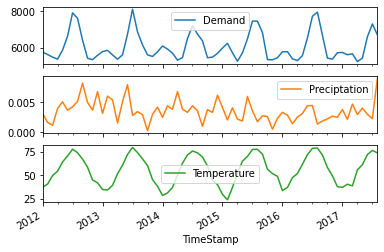

In [63]:
month_level.plot(subplots=True);

In [64]:
month_level_df = df1.resample('M').mean()

In [65]:
month_level_df.head()

,Demand,Preciptation,Temperature
TimeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078


In [66]:
#!pip install pmdarima

In [67]:
import pmdarima as pm

pmdarima_model = pm.auto_arima(month_level_df['Demand'],m=12, seasonal= True,
                               start_p =0, start_q=0, max_order = 4, test='adf',stepwise=True,
                               trace= True,error_action="ignore",supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.01 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.58 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.04 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1026.318, Time=1.65 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1101.718, Time=0.07 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.059, Time=0.64 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.211, Time=0.08 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1013.801, Time=2.20 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.77 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.35 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=1011.617, Time=2.40 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=1010.765, Time=0.89 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=1022.778, Time=0.07 sec
 ARIMA(3,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



 ARIMA(3,0,0)(0,0,1)[12] intercept   : AIC=999.713, Time=0.66 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



 ARIMA(3,0,0)(0,0,2)[12] intercept   : AIC=995.445, Time=1.44 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



 ARIMA(3,0,0)(1,0,2)[12] intercept   : AIC=1006.777, Time=1.88 sec
 ARIMA(2,0,0)(0,0,2)[12] intercept   : AIC=993.144, Time=1.47 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=997.347, Time=0.41 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



 ARIMA(2,0,0)(1,0,2)[12] intercept   : AIC=995.136, Time=1.45 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=1.11 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=994.749, Time=1.78 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=1000.737, Time=1.32 sec


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



 ARIMA(3,0,1)(0,0,2)[12] intercept   : AIC=999.150, Time=1.95 sec
 ARIMA(2,0,0)(0,0,2)[12]             : AIC=inf, Time=1.15 sec

Best model:  ARIMA(2,0,0)(0,0,2)[12] intercept
Total fit time: 29.781 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [68]:
pmdarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.572
Date:                                 Wed, 21 Oct 2020   AIC                            993.144
Time:                                         18:03:29   BIC                           1006.461
Sample:                                              0   HQIC                           998.420
                                                  - 68                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6223    792.261      4.697      0.000    2168.819    5274.425
ar.L1          0.8586      0.123      6.985      0.000       0.618       1.099
ar.L2         -0.4748      0.142     -3.352      0.001      -0.752      -0.197
ma.S.L12       0.8923      0.137      6.501      0.000       0.623       1.161
ma.S.L24       0.4571      0.206      2.222      0.026       0.054       0.860
sigma2      9.046e+04   1.58e+04      5.726      0.000    5.95e+04    1.21e+05
===================================================================================
Ljung-Box (Q):                       64.20   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.01   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
month_level_df.shape

(68, 3)

In [70]:
#splitting the data

train =  month_level_df[(month_level_df.index.get_level_values(0) >= '2012-01-31') & (month_level_df.index.get_level_values(0) <= '2017-04-30')]
test =  month_level_df[(month_level_df.index.get_level_values(0) >= '2017-04-30')]

In [71]:
test

,Demand,Preciptation,Temperature
TimeStamp,,,
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7306.861511,0.002272,76.380833
2017-08-31,6711.707542,0.008961,73.730258


In [72]:
pmdarima_model.fit(train['Demand'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 2, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [73]:
forecasting = pmdarima_model.predict(n_periods=5, return_conf_int =  True)

In [74]:
forecasting

(array([5320.83276481, 6194.15059103, 7184.10813912, 7297.99963102,
        6401.92728851]), array([[4724.3701973 , 5917.29533232],
        [5391.43561482, 6996.86556723],
        [6358.6199663 , 8009.59631194],
        [6467.74937119, 8128.24989086],
        [5553.64733135, 7250.20724568]]))

In [75]:
forecasted_df = pd.DataFrame(forecasting[0],index= test.index,columns=['Predicted Values'])

In [76]:
forecasted_df

,Predicted Values
TimeStamp,
2017-04-30,5320.832765
2017-05-31,6194.150591
2017-06-30,7184.108139
2017-07-31,7297.999631
2017-08-31,6401.927289


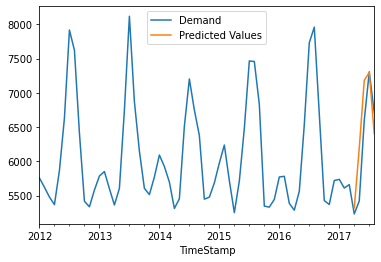

In [77]:
pd.concat([month_level_df['Demand'], forecasted_df],axis=1).plot()

In [78]:
forecasting2 = pmdarima_model.predict(n_periods=10, return_conf_int =  True)

In [80]:
forecasting2

(array([5320.83276481, 6194.15059103, 7184.10813912, 7297.99963102,
        6401.92728851, 5789.92421436, 5693.03964211, 5951.57310624,
        5892.05060436, 5734.6084951 ]), array([[4724.3701973 , 5917.29533232],
        [5391.43561482, 6996.86556723],
        [6358.6199663 , 8009.59631194],
        [6467.74937119, 8128.24989086],
        [5553.64733135, 7250.20724568],
        [4934.10753803, 6645.74089069],
        [4837.08540927, 6548.99387495],
        [5094.94723912, 6808.19897336],
        [5034.59977432, 6749.50143439],
        [4876.91516664, 6592.30182356]]))

In [81]:
forecast_range = pd.date_range(start ='2017-04-30',periods=10, freq='M' )

In [82]:
forecast_range

DatetimeIndex(['2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
               '2017-12-31', '2018-01-31'],
              dtype='datetime64[ns]', freq='M')

In [83]:
forecasting2_df = pd.DataFrame(forecasting2[0],index= forecast_range,columns=['Predicted Values'])

In [84]:
forecasting2_df

,Predicted Values
2017-04-30,5320.832765
2017-05-31,6194.150591
2017-06-30,7184.108139
2017-07-31,7297.999631
2017-08-31,6401.927289
2017-09-30,5789.924214
2017-10-31,5693.039642
2017-11-30,5951.573106
2017-12-31,5892.050604
2018-01-31,5734.608495


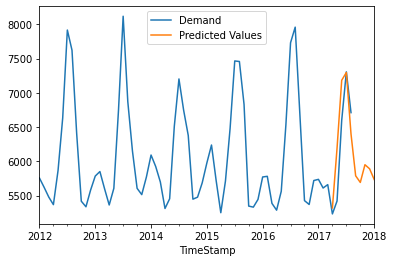

In [85]:
#this may or may not seem right, this is where confidence interval comes to play
pd.concat([month_level_df['Demand'], forecasting2_df],axis=1).plot()

In [87]:
lower_bound = pd.Series(forecasting2[1][:,0], index=forecast_range)
upper_bound = pd.Series(forecasting2[1][:,1], index=forecast_range)

In [88]:
lower_bound

2017-04-30    4724.370197
2017-05-31    5391.435615
2017-06-30    6358.619966
2017-07-31    6467.749371
2017-08-31    5553.647331
2017-09-30    4934.107538
2017-10-31    4837.085409
2017-11-30    5094.947239
2017-12-31    5034.599774
2018-01-31    4876.915167
Freq: M, dtype: float64

In [89]:
upper_bound

2017-04-30    5917.295332
2017-05-31    6996.865567
2017-06-30    8009.596312
2017-07-31    8128.249891
2017-08-31    7250.207246
2017-09-30    6645.740891
2017-10-31    6548.993875
2017-11-30    6808.198973
2017-12-31    6749.501434
2018-01-31    6592.301824
Freq: M, dtype: float64

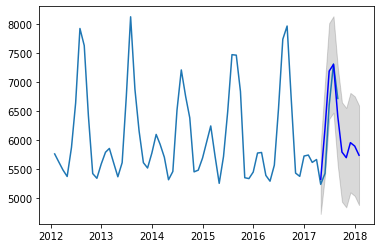

In [92]:
plt.plot(month_level_df['Demand'])
plt.plot(forecasting2_df,color='blue')

plt.fill_between(forecast_range,lower_bound,upper_bound,color='k',alpha=.15)

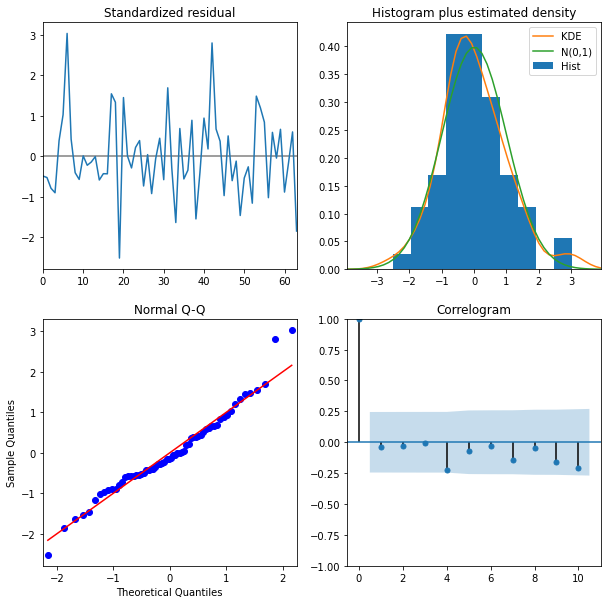

In [97]:
out = pmdarima_model.plot_diagnostics(figsize=(10,10))